# CS109a Final Project: Group 90 <br>Predicting damage of US storms<br>
### Data Science 1: CS 109A/STAT 121A/AC 209A/ E 109A <br> Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave
#### Harvard University <br> Fall 2017 <br> 
#### Date: December 7, 2017<br> Written By: George Hu, Manav Khandelwal, Josh Kuppersmith, and Evan Mackay <br> 

---




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# from zipcode
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time

# Part 1: Loading In Data

In [9]:
# load in all data for 2016 and 2017

details_2016 = pd.read_csv('Details_2016.csv', encoding = "latin1")
details_2017 = pd.read_csv('Details_2017.csv', encoding = "latin1")
locations_2016 = pd.read_csv('Locations_2016.csv', encoding = "latin1")
locations_2017 = pd.read_csv('Locations_2017.csv', encoding = "latin1")
fatalities_2016 = pd.read_csv('Fatalities_2016.csv', encoding = "latin1")
fatalities_2017 = pd.read_csv('Fatalities_2017.csv', encoding = "latin1")

print(details_2016.shape)
details_2016.head()

(33519, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,7/15/16 17:15,EST-5,7/15/16 17:15,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,7/15/16 17:25,EST-5,7/15/16 17:25,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,7/16/16 12:46,EST-5,7/16/16 12:46,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,7/8/16 17:55,EST-5,7/8/16 17:55,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,7/8/16 18:10,EST-5,7/8/16 18:10,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


In [10]:
# vertically merge

details = pd.concat([details_2016, details_2017])
locations = pd.concat([locations_2016, locations_2017])
fatalities = pd.concat([fatalities_2016, fatalities_2017])

print(details.shape)
details.head()

(80732, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,7/15/16 17:15,EST-5,7/15/16 17:15,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,7/15/16 17:25,EST-5,7/15/16 17:25,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,7/16/16 12:46,EST-5,7/16/16 12:46,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,7/8/16 17:55,EST-5,7/8/16 17:55,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,7/8/16 18:10,EST-5,7/8/16 18:10,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


# Part 2: Preliminary Data Analysis and Cleaning

In [11]:
# look at column names

print(list(details.columns))
print()
print(list(locations.columns))
print()
print(list(fatalities.columns))

['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE']

['YEARMONTH', 'EPISODE_ID', 'EVENT_ID', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2']

['FAT_YEARMONTH', 'FAT_DAY', 'FAT_TIME', 'FATALITY_ID', 'EVENT_ID', 'FATALITY_TYPE', 'FATALITY_DATE', 'FA

In [12]:
# re-format Property and Crop Damage

print(details['DAMAGE_PROPERTY'][details['DAMAGE_PROPERTY'].isnull()].size)

damage_property = []
for i in details["DAMAGE_PROPERTY"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_property.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_property.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_property.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_property.append(dam)
                except:
                    print(i)
                    
damage_crops = []
for i in details["DAMAGE_CROPS"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_crops.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_crops.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_crops.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_crops.append(dam)
                except:
                    print(i)
                    
details["DAMAGE_PROPERTY"] = damage_property
details["DAMAGE_CROPS"] = damage_crops

print(details['DAMAGE_PROPERTY'][details['DAMAGE_PROPERTY'].isnull()].size)
        
# create new Total Damage Column
    
details['DAMAGE_TOTAL'] = details['DAMAGE_PROPERTY'] + details['DAMAGE_CROPS']

11979
11979


In [13]:
# Make new categorical column for has_damage

has_damage = []
for x in details['DAMAGE_TOTAL']:
    if x > 0.0:
        has_damage.append(1)
    else:
        has_damage.append(0)

details['HAS_DAMAGE'] = has_damage
details['HAS_DAMAGE'].head()

0    1
1    0
2    0
3    0
4    0
Name: HAS_DAMAGE, dtype: int64

In [14]:
# merge details and location data

data = pd.merge(details, locations, how='inner', on=['EPISODE_ID', 'EVENT_ID'])
print(data.shape)
data.head()

## NOTE: possibility to merge on fatalities, but there are very few (766) so this would be a special case model
## perhaps use for some final added analysis
## data = pd.merge(data1, fatalities, how='inner', on=['EVENT_ID'])

(72734, 62)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,DAMAGE_TOTAL,HAS_DAMAGE,YEARMONTH,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201608,11,1632,201608,11,1632,109741,656477,NEBRASKA,31,2016,August,Thunderstorm Wind,C,51,DIXON,FSD,8/11/16 16:32,CST-6,8/11/16 16:32,0,0,0,0,2000.0,0.0,Public,61.0,EG,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NW,WAKEFIELD,4.0,NW,WAKEFIELD,42.31,-96.92,42.31,-96.92,Thunderstorms produced damaging winds in Dixon...,Thunderstorm winds damaged farm outbuildings a...,CSV,2000.0,1,201608,1,3.76,NW,WAKEFIELD,42.31,-96.92,4218600,9655200
1,201608,11,1700,201608,11,1700,109741,656478,NEBRASKA,31,2016,August,Thunderstorm Wind,C,43,DAKOTA,FSD,8/11/16 17:00,CST-6,8/11/16 17:00,0,0,0,0,0.0,0.0,Trained Spotter,52.0,EG,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,HOMER,1.0,W,HOMER,42.32,-96.49,42.32,-96.49,Thunderstorms produced damaging winds in Dixon...,"Thunderstorm winds caused tree damage, includi...",CSV,0.0,0,201608,1,0.51,W,HOMER,42.32,-96.49,4219200,9629400
2,201608,11,1717,201608,11,1717,109742,656479,IOWA,19,2016,August,Thunderstorm Wind,C,193,WOODBURY,FSD,8/11/16 17:17,CST-6,8/11/16 17:17,0,0,0,0,20000.0,0.0,Emergency Manager,61.0,EG,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,SALIX,1.0,S,SALIX,42.31,-96.28,42.31,-96.28,Thunderstorms produced damaging winds at a few...,"Thunderstorm winds caused tree damage, includi...",CSV,20000.0,1,201608,1,0.69,S,SALIX,42.31,-96.28,4218600,9616800
3,201608,11,1720,201608,11,1720,109742,656571,IOWA,19,2016,August,Thunderstorm Wind,C,193,WOODBURY,FSD,8/11/16 17:20,CST-6,8/11/16 17:20,0,0,0,0,0.0,0.0,Law Enforcement,61.0,EG,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,LUTON,1.0,N,LUTON,42.34,-96.23,42.34,-96.23,Thunderstorms produced damaging winds at a few...,Thunderstorm winds blew over a grain bin.,CSV,0.0,0,201608,1,0.69,N,LUTON,42.34,-96.23,4220400,9613800
4,201608,11,1723,201608,11,1723,109742,656572,IOWA,19,2016,August,Thunderstorm Wind,C,193,WOODBURY,FSD,8/11/16 17:23,CST-6,8/11/16 17:23,0,0,0,0,0.0,0.0,Emergency Manager,73.0,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,HOLLY SPGS,1.0,W,HOLLY SPGS,42.27,-96.09,42.27,-96.09,Thunderstorms produced damaging winds at a few...,Thunderstorm winds caused tree damage.,CSV,0.0,0,201608,1,1.02,W,HOLLY SPGS,42.27,-96.09,4216200,965400


# Part 3: Some of our EDA

ValueError: incompatible sizes: argument 'height' must be length 67 or scalar

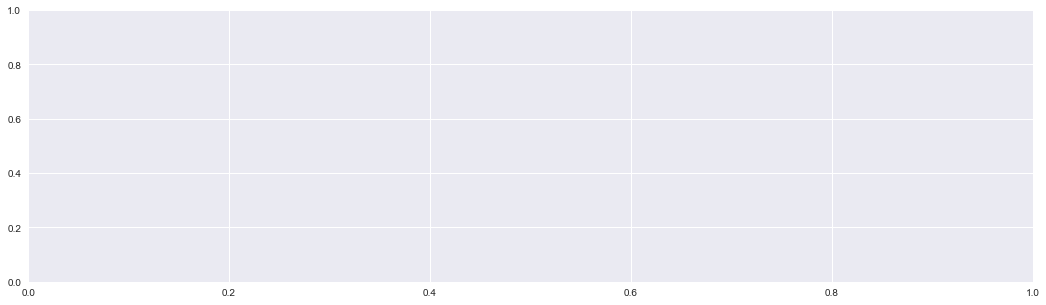

In [15]:
# storm counts by state

import seaborn as sns
sns.set(color_codes=True)
storm_counts_loc = np.unique(details['STATE'], return_counts=True)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(67), storm_counts_loc[1], align='center', alpha=0.5)
ax.set_xlim([-1, 67])
ax.set_xticks(range(67))
ax.set_xticklabels(storm_counts_loc[0], rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by State/Region')

plt.show()

(array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'], dtype=object), array([ 6399,  8655,  4402,  4256,  5646, 16091, 10528,  7248, 10124,
        2035,  2140,  3208]))


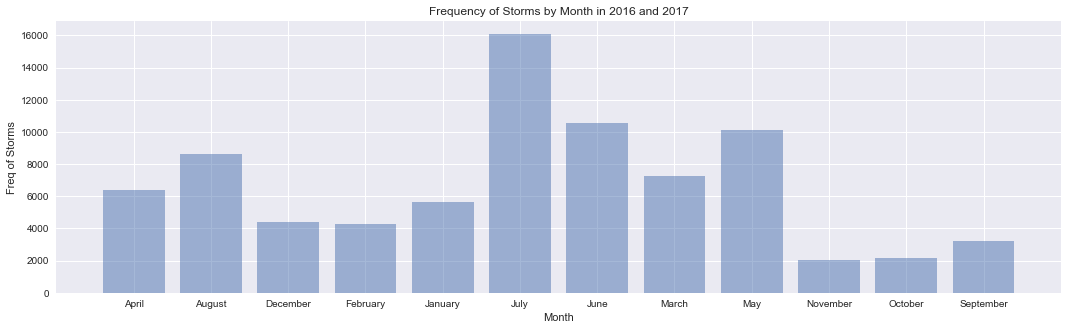

In [16]:
# storm count by month

storm_counts_mo = np.unique(details['MONTH_NAME'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(12), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Month in 2016 and 2017')

plt.show()

(array([2016, 2017]), array([33519, 47213]))


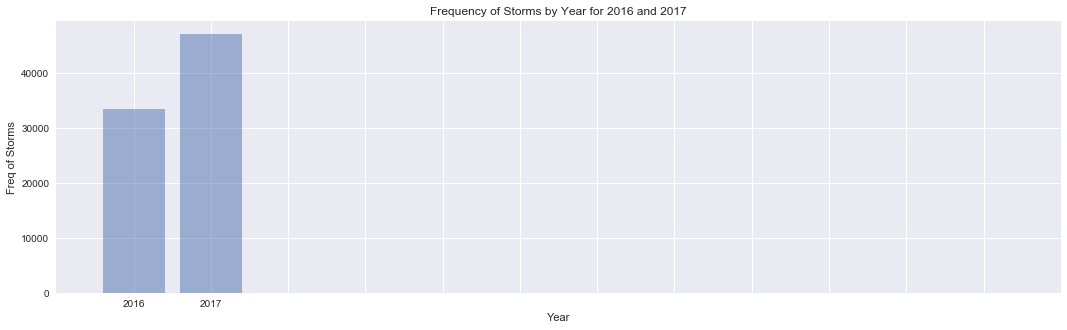

In [17]:
# storm count by year

storm_counts_mo = np.unique(details['YEAR'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(2), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Year')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Year for 2016 and 2017')

plt.show()

In [18]:
# EDA, out of storms with damage, where are they occuring

damage_data = data[data['HAS_DAMAGE'] == 1]
print(len(damage_data))

21294


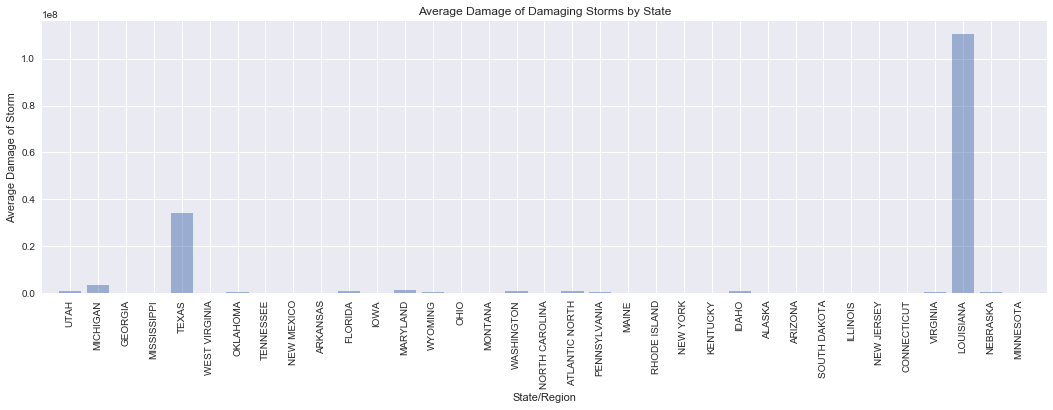

In [19]:
# display average damage per state given causes damage

sns.set(color_codes=True)

states = list(set(damage_data['STATE'].values))

states_final = []
ave_per_state = []
for i in range(len(states)):
    state = states[i]
    state_damage = damage_data[damage_data['STATE'] == state]['DAMAGE_TOTAL']
    if len(state_damage) > 10:
        ave = np.mean(state_damage)
        states_final.append(state)
        ave_per_state.append(ave)
        
# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(ave_per_state)), ave_per_state, align='center', alpha=0.5)
ax.set_xlim([-1, 35])
ax.set_xticks(range(35))
ax.set_xticklabels(states_final, rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by State')

plt.show()

['Hail', 'Debris Flow', 'Flash Flood', 'Lightning', 'Funnel Cloud', 'Waterspout', 'Heavy Rain', 'Marine Thunderstorm Wind', 'Flood', 'Marine Strong Wind', 'Dust Devil', 'Thunderstorm Wind', 'Tornado']


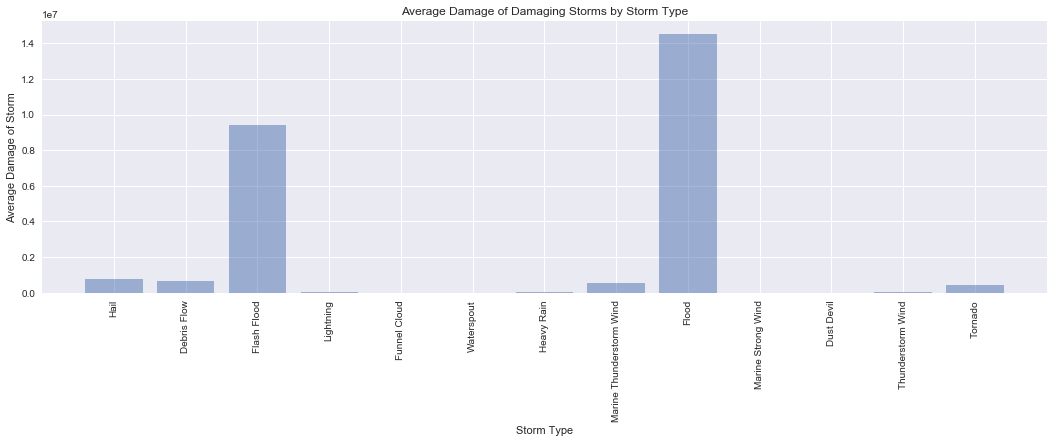

In [20]:
# display average damage per storm type given causes damage

sns.set(color_codes=True)

storm_types = list(set(damage_data['EVENT_TYPE'].values))
print(storm_types)

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = damage_data[damage_data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

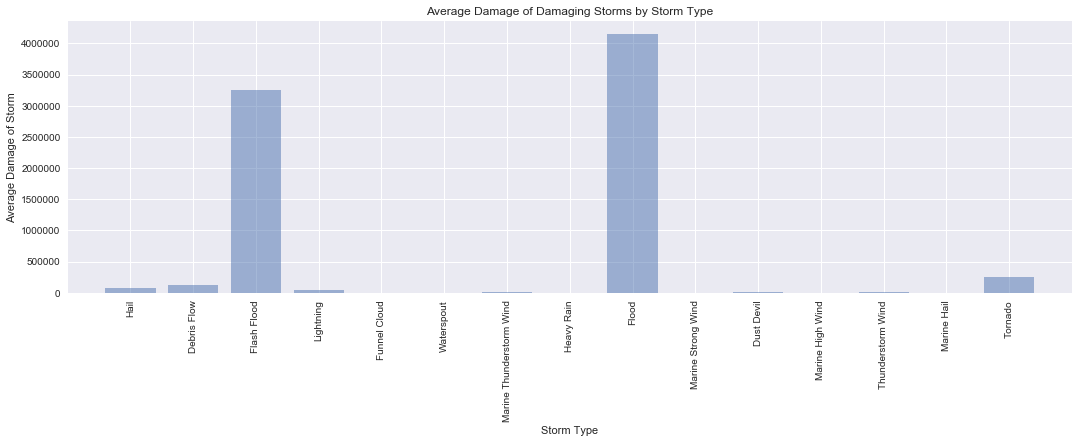

In [21]:
# display average damage per storm type without conditioning on damage causing

sns.set(color_codes=True)

storm_types = list(set(data['EVENT_TYPE'].values))

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = data[data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

# Part 4: More Cleaning and *Handling of Nulls*

# Evan's Work Here

In [22]:
print(data.shape)

(72734, 62)


In [64]:
#data.isnull().any()
data.isnull().any().head()

# Which columns have any NA's? Followed by missing percentage
# DAMAGE_PROPERTY        11%
# DAMAGE_CROPS           11.6%
# MAGNITUDE              44%
# MAGNITUDE_TYPE         61%
# FLOOD_CAUSE            57%
# CATEGORY              99.998%
# TOR_F_SCALE           96%
# TOR_LENGTH            96%
# TOR_WIDTH             96%
# TOR_OTHER_WFO         99.6%
# TOR_OTHER_CZ_STATE     99.6%
# TOR_OTHER_CZ_FIPS      99.6%
# TOR_OTHER_CZ_NAME      99.6%
# EVENT_NARRATIVE        10%
# DAMAGE_TOTAL           12.9%

# These are the variables of interest at the moment 
#['DAMAGE_PROPERTY', 'DAMAGE_CROPS','BEGIN_YEARMONTH', 'BEGIN_DAY','STATE_FIPS', 
# 'YEAR','CZ_FIPS','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE']

BEGIN_YEARMONTH    False
BEGIN_DAY          False
BEGIN_TIME         False
END_YEARMONTH      False
END_DAY            False
dtype: bool

In [66]:
for i in range(0, data.shape[1]):
    print(data.iloc[:,i].isnull().values.sum() / data.shape[0])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.113014546154
0.116520471856
0.0
0.444345148074
0.616932933704
0.57534303077
0.999986251272
0.962465971898
0.962465971898
0.962465971898
0.99624659719
0.99624659719
0.99624659719
0.99624659719
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.103417933841
0.0
0.128949322188
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [35]:
data.head()
print(data.shape)
evan_data_subset = data.copy()
# evan_data_subset = evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flood"]
# print(evan_data_subset.shape)
# print(evan_data_subset["FLOOD_CAUSE"].value_counts())
# len(evan_data_subset["FLOOD_CAUSE"]) - evan_data_subset["TOR_F_SCALE"].count()
# #len(evan_data_subset["FLOOD_CAUSE"])
# evan_data_subset["TOR_F_SCALE"].value_counts()

(72734, 62)


In [54]:
data.head()
# print(data.shape)
evan_data_subset = data.copy()
evan_data_subset["DAMAGE_PROPERTY"].isnull().values.sum() / len(evan_data_subset["DAMAGE_PROPERTY"])
#print(evan_data_subset.isnull().any())[1:64]
#evan_data_subset["BEGIN_YEARMONTH"].isnull().values.sum()

0.11301454615448071

In [61]:
evan_data_subset.iloc[:,3]

for i in range(0, evan_data_subset.shape[1]):
    print(evan_data_subset.iloc[:,i].isnull().values.sum() / len(evan_data_subset["DAMAGE_PROPERTY"]))

#evan_data_subset["DAMAGE_PROPERTY"].isnull().values.sum() / len(evan_data_subset["DAMAGE_PROPERTY"])


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.113014546154
0.116520471856
0.0
0.444345148074
0.616932933704
0.57534303077
0.999986251272
0.962465971898
0.962465971898
0.962465971898
0.99624659719
0.99624659719
0.99624659719
0.99624659719
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.103417933841
0.0
0.128949322188
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [136]:
# Magnitude seems to be a very important variable, but it has high missingness
data["MAGNITUDE"].isnull().values.sum() / len(data["MAGNITUDE"])
data["EVENT_TYPE"].isnull().values.sum() / len(data["MAGNITUDE"])
print(data["EVENT_TYPE"].value_counts())


# Organize by those with the same type of event and MAGNITUDE TYPE
#evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flood"]

# Among those of event type Thunderstorm Wind, none are missing a Magnitude of Magnitude type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Thunderstorm Wind"]["MAGNITUDE"].isnull().values.sum()
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Thunderstorm Wind"]["MAGNITUDE_TYPE"].isnull().values.sum()

# With 90% missingness, imputing is not advised. Additionally, the measurements are about wind, which doesn't make lots of sense for a Flood
# Among those of event type Flash Flood, 89% are missing Magnitude, and 92% are missing Magnitude Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flash Flood"]["MAGNITUDE"].isnull().values.sum() / 18449
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flash Flood"]["MAGNITUDE_TYPE"].isnull().values.sum() / 18449

evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flash Flood"]["MAGNITUDE_TYPE"].value_counts()
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flash Flood"]["MAGNITUDE"]

# Among those of event type Hail, 0% are missing Magnitude, but 95% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Hail"]["MAGNITUDE"].isnull().values.sum() / 11942
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Hail"]["MAGNITUDE_TYPE"].isnull().values.sum() / 11942

# Imputation is not recommended for floods
# Among those of event type Flood, 90% are missing Magnitude, and 92% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flood"]["MAGNITUDE"].isnull().values.sum() / 11062
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Flood"]["MAGNITUDE_TYPE"].isnull().values.sum() / 11062

# Among those of event type Marine Thunderstorm Wind, 0% are missing Magnitude, and 0% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Marine Thunderstorm Wind"]["MAGNITUDE"].isnull().values.sum() / 2581
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Marine Thunderstorm Wind"]["MAGNITUDE_TYPE"].isnull().values.sum() / 2581

# Imputation is not recommended for tornado
# Among those of event type Tornado, 93% are missing Magnitude, and 96% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Tornado"]["MAGNITUDE"].isnull().values.sum() / 2420
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Tornado"]["MAGNITUDE_TYPE"].isnull().values.sum() / 2420

# Imputation is not recommended for Heavy Rain
# Among those of event type Heavy Rain, 88% are missing Magnitude, and 93% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Heavy Rain"]["MAGNITUDE"].isnull().values.sum() / 2385
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Heavy Rain"]["MAGNITUDE_TYPE"].isnull().values.sum() / 2385

evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Heavy Rain"]["MAGNITUDE"]
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Heavy Rain"]["MAGNITUDE_TYPE"].value_counts()
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Heavy Rain"]["MAGNITUDE_TYPE"]

# Imputation is not recommended for Debris Flow
# Among those of event type Debris Flow, 98% are missing Magnitude, and 98% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Debris Flow"]["MAGNITUDE"].isnull().values.sum() / 566
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Debris Flow"]["MAGNITUDE_TYPE"].isnull().values.sum() / 566

evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Debris Flow"]["MAGNITUDE"]
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Debris Flow"]["MAGNITUDE_TYPE"].value_counts()
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Debris Flow"]["MAGNITUDE_TYPE"]

# Imputation is not recommended for Lightning
# Among those of event type Lightning, 83% are missing Magnitude, and 87% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Lightning"]["MAGNITUDE"].isnull().values.sum() / 502
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Lightning"]["MAGNITUDE_TYPE"].isnull().values.sum() / 502

evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Lightning"]["MAGNITUDE"]
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Lightning"]["MAGNITUDE_TYPE"].value_counts()
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Lightning"]["MAGNITUDE_TYPE"]


# Imputation is not recommended for Funnel Cloud
# Among those of event type Funnel Cloud, 88% are missing Magnitude, and 92% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE"].isnull().values.sum() / 375
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE_TYPE"].isnull().values.sum() / 375

evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE"]
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE_TYPE"].value_counts()
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE_TYPE"]

# Imputation is not recommended for Funnel Cloud
# Among those of event type Funnel Cloud, 88% are missing Magnitude, and 92% are missing Magnitude_Type
evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE"].isnull().values.sum() / 375
# evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE_TYPE"].isnull().values.sum() / 375

# evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE"]
# evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE_TYPE"].value_counts()
# evan_data_subset.loc[evan_data_subset['EVENT_TYPE'] == "Funnel Cloud"]["MAGNITUDE_TYPE"]



Thunderstorm Wind           22015
Flash Flood                 18449
Hail                        11942
Flood                       11062
Marine Thunderstorm Wind     2581
Tornado                      2420
Heavy Rain                   2385
Debris Flow                   566
Lightning                     502
Funnel Cloud                  375
Waterspout                    341
Marine Hail                    44
Marine High Wind               30
Dust Devil                     13
Marine Strong Wind              9
Name: EVENT_TYPE, dtype: int64


119      NaN
120      NaN
187      NaN
192      NaN
354      NaN
537      NaN
740      NaN
929      NaN
1189      EG
1453      MG
1646     NaN
1647      MG
1648     NaN
1649     NaN
1781      EG
2007     NaN
2177     NaN
2178     NaN
2334      EG
2694      EG
2834     NaN
4349     NaN
4352     NaN
4354      MG
4547     NaN
4548     NaN
4920     NaN
5105     NaN
5111     NaN
5550     NaN
        ... 
67068    NaN
67069    NaN
67140    NaN
67559    NaN
67611    NaN
67862    NaN
68046    NaN
68347    NaN
68638    NaN
69018    NaN
69461    NaN
69540    NaN
69541    NaN
69542    NaN
69655    NaN
69858    NaN
69951    NaN
70022    NaN
70178    NaN
70223    NaN
70589    NaN
70590    NaN
70591    NaN
70706    NaN
71346    NaN
72137    NaN
72143    NaN
72330    NaN
72499    NaN
72518    NaN
Name: MAGNITUDE_TYPE, Length: 375, dtype: object

# .


# .
# .
# .
# .
# .
# .


# End of Evan's Work - Rest of Josh's file continues here

In [15]:
# drop null rows and check if any null values remaining
# MORE ROBUST

print(data.shape)
data.dropna(inplace=True, subset = ['DAMAGE_PROPERTY', 'DAMAGE_CROPS','BEGIN_YEARMONTH', 'BEGIN_DAY','STATE_FIPS', 'YEAR','CZ_FIPS','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE'])      
print(data.shape)

# deleted 50000 rows
# need to do better than this! Handle later on

(87563, 62)
(31659, 62)


### EDA on Our Response Variable

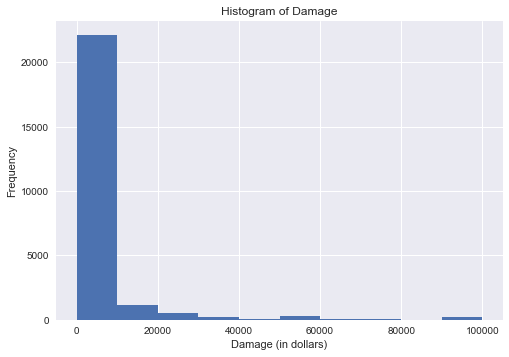

In [16]:
data["DAMAGE_PROPERTY"] = pd.Series(damage_property)
plt.hist(x=data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY <= 100000])
plt.xlabel("Damage (in dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

In [17]:
np.corrcoef(data["DAMAGE_TOTAL"],data["DEATHS_DIRECT"])

array([[  1.00000000e+00,  -2.09943846e-04],
       [ -2.09943846e-04,   1.00000000e+00]])

In [18]:
# validation of our damage estimates
data.DAMAGE_TOTAL[data.DAMAGE_TOTAL > 100000].shape

(443,)

In [19]:
import scipy.stats as ss
print("Mean: {}".format(round(np.mean(data.DAMAGE_TOTAL)),4))
print("Median: {}".format(np.median(data.DAMAGE_TOTAL)))
print("Skew: {}".format(round(ss.skew(data.DAMAGE_TOTAL),2)))

Mean: 33968
Median: 0.0
Skew: 146.33


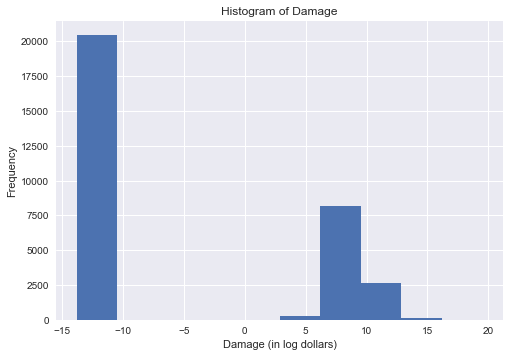

In [20]:
# we see our big concentration at 0, and a (hopefully) near-normal distribution otherwise

plt.hist(x=np.log(data.DAMAGE_TOTAL + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

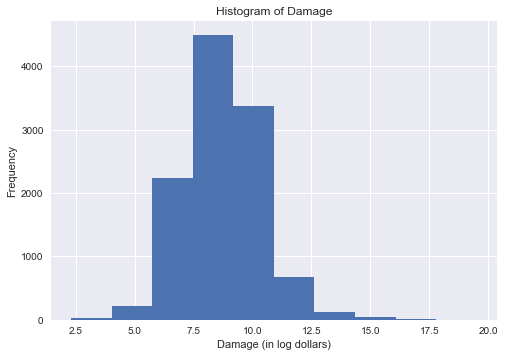

In [21]:
# confirming near-normal response for data with a damage over 0

plt.hist(x=np.log(data.DAMAGE_TOTAL[data.DAMAGE_TOTAL>0] + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

# Part 5: Zipcode Work

In [ ]:
zip_data = pd.read_csv("AfterGotZips2016.csv", 
                      encoding = "ISO-8859-1")
zip_data["BEGIN_ZIP"].head()

In [ ]:
import requests

s = requests.session()
#s.headers['user-agent'] = 'Mozilla/5.0'
print(s) 
r = s.get('https://factfinder.census.gov/rest/communityFactsNav/nav', params={'searchTerm': 99501})
r
type(r.json())

In [ ]:
r.json().keys()
r.json()['CFMetaData'].keys()

In [ ]:
r.json()['CFMetaData']['measureAndLinksContent']

In [ ]:
html = r.json()['CFMetaData']['measureAndLinksContent']

In [ ]:
s.get('https://factfinder.census.gov/bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US99501')
r = s.get('https://factfinder.census.gov/tablerestful/tableServices/renderProductData')
r.json().keys()
#['ProductData']
r.json()['ProductData'].keys()

In [ ]:
import requests
s = requests.session()
s.headers['user-agent'] = 'Mozilla/5.0'

s.get('https://factfinder.census.gov/bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US99501')
#<Response [200]>
r = s.get('https://factfinder.census.gov/tablerestful/tableServices/renderProductData')
r.json().keys()
#['ProductData']
r.json()['ProductData']['productDataTable'][:50]

In [ ]:
import requests
from   bs4 import BeautifulSoup
from IPython.core.display import display, HTML

# This is just to get the column names

zipcodes = ['32963']

base   = 'https://factfinder.census.gov/'
report = base + 'bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US'
render = base + 'tablerestful/tableServices/renderProductData'

with requests.session() as s:

    for zipcode in zipcodes:
        s.get(report + zipcode)
        r = s.get(render)

        html = r.json()['ProductData']['productDataTable']
        soup = BeautifulSoup(html, 'html.parser')
        
        rows = soup.find("table").find_all("tr")[2:217]
        
        my_cols = []
        
        for row in rows:
            headers = row.find_all("th")
            for header in headers:
                actual_header = header.get_text()
                count = actual_header + "count"
                perc = actual_header + "percent"
                my_cols.append(count)
                my_cols.append(perc)

In [ ]:
unknown_counter = 0
print(len(zip_data["BEGIN_ZIP"][24256:]))
print(len(zip_data["BEGIN_ZIP"]))

In [ ]:
# This part is just extracting data then


zipcodes = zip_data["BEGIN_ZIP"][24256:]

scraped = pd.DataFrame()

base   = 'https://factfinder.census.gov/'
report = base + 'bkmk/table/1.0/en/DEC/10_DP/DPDP1/8600000US'
render = base + 'tablerestful/tableServices/renderProductData'

with requests.session() as s:
    #s.headers['user-agent'] = 'Mozilla/5.0'

    for zipcode in zipcodes:
        #print(zipcode)
        
        if zipcode == "Unknown":
            unknown_counter = unknown_counter + 1
        
        else:
            
            time.sleep(3)
            s.get(report + zipcode)
            r = s.get(render)

            html = r.json()['ProductData']['productDataTable']
            soup = BeautifulSoup(html, 'html.parser')
            #print(soup)

            rows = soup.find("table").find_all("tr")[2:217]

            my_cols = []
            my_data = []
            data_zipcode = {}

            for row in rows:
                #print("inhere")
                #print(row)
                headers = row.find_all("th")
                for header in headers:
                    actual_header = header.get_text()

                    count = actual_header + "count"
                    perc = actual_header + "percent"

                    my_cols.append(count)
                    my_cols.append(perc)

                datums = row.find_all("td") # + row.find_all("th")
                #print(datums)

                actual_data = []

                for datum in datums:
                    #print(datum)
                    actual_data.append(datum.get_text())
                    my_data.append(datum.get_text())
                    #print(datum.get_text())
                #print(actual_data)

                data_zipcode[actual_header] = actual_data
            #print(my_data)
            #print(zipcode)
            my_data = [zipcode] + my_data
            #print(my_data)
            scraped[zipcode] = my_data
    #         print(rows)
    #         datums = rows.find_all("td")[0]
    #         print('now datums')
    #         print(datums.get_text())

            #display(HTML(soup.prettify()))

In [ ]:
scraped.shape

In [ ]:
if my_cols[0] != "Zipcode":
    my_cols = ["Zipcode"] + my_cols
better_scraped = scraped.transpose()
better_scraped
print(len(my_cols))
print(better_scraped.shape)

In [ ]:
better_scraped.columns = my_cols
better_scraped

In [ ]:
better_scraped.to_csv("32_457_MonPM2010.csv")

In [ ]:
better_scraped_remove_r = pd.read_csv("ScrapedZipCodeInfo.csv", encoding = "ISO-8859-1")
better_scraped_remove_r.head()

In [ ]:
better_scraped_remove_r.to_csv("ScrapedZipCodeInfo_NoR.csv")

In [ ]:
example = "308,745,538(r38234)"
example.split("(")[0]

In [ ]:
better_scraped_remove_r["Total populationcount"][58:68]

In [ ]:
file = open("laborforce_annual_2015.txt", "r") 
file.read() 

# Part 6: More EDA

In [ ]:
## Focus on EDA to see what from the zipcode data might be useful

# Part 7: Merge Data and Prepare Predictors

In [22]:
## WORK TO MERGE IN ZIPCODE DATA
## THEN IT CAN BE USED FOR PRELIMINARY MODEL

In [23]:

#train_cols = cols.remove([['BEGIN_YEARMONTH', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'AZIMUTH', 'LOCATION', 'LAT2', 'LON2']])
#train_cols = ['BEGIN_DAY', 'YEAR','CZ_FIPS','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE', 'STATE', 'EVENT_TYPE', 'CZ_TYPE', 'MONTH_NAME', 'CZ_TIMEZONE']
train_cols = ['EVENT_TYPE', 'STATE', 'MAGNITUDE', 'CZ_TIMEZONE', 'RANGE', 'LATITUDE', 'LONGITUDE']

X = data[train_cols]
y = data['HAS_DAMAGE']

#X = pd.get_dummies(X, columns=['STATE','EVENT_TYPE','CZ_TYPE', 'MONTH_NAME', 'CZ_TIMEZONE'], drop_first=True)
X = pd.get_dummies(X, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Part 8: Preliminary Classification Model

In [26]:
# fit prelim model

print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

#print(X_train[X_train.isnull().any(axis=1)].size)
#print(y_train[y_train.isnull()].size)
#print(X_test[X_test.isnull().any(axis=1)].size)
#print(y_test[y_test.isnull()].size)

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))


Num points without damage: 20454
Num points with damage: 11205

Training Accuracy: 0.818443260572
Testing Accuracy: 0.820444104135


# Part 9: Improving Classification Model

# Part 10: Preliminary Regression Model

# Part 11:  Improving Regression Model

# Part 12: Model Analysis and Presentation